# **Data Wrangling**

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv('House Pricing.csv')
print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [ ]:
bins = [0, 35, 60, 100]
labels = ['Young', 'Middle-aged', 'Old']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)
print(data[['age', 'age_group']].head(10))

     age    age_group
0   65.2          Old
1   78.9          Old
2   61.1          Old
3   45.8  Middle-aged
4   54.2  Middle-aged
5   58.7  Middle-aged
6   66.6          Old
7   96.1          Old
8  100.0          Old
9   85.9          Old


In [ ]:
data['is_charles_river'] = data['chas'].map({0: 'No', 1: 'Yes'})
print(data[['chas', 'is_charles_river']].head())

   chas is_charles_river
0     0               No
1     0               No
2     0               No
3     0               No
4     0               No


In [ ]:
def remove_outliers_iqr(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return df

numerical_cols = ['crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']

for col in numerical_cols:
    data = remove_outliers_iqr(col)

print(data.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
5  0.02985   0.0   2.18     0  0.458  6.430  58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012  66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172  96.1  5.9505    5  311     15.2   

        b  lstat  medv    age_group is_charles_river  
0  396.90   4.98  24.0          Old               No  
1  396.90   9.14  21.6          Old               No  
5  394.12   5.21  28.7  Middle-aged               No  
6  395.60  12.43  22.9          Old               No  
7  396.90  19.15  27.1          Old               No  


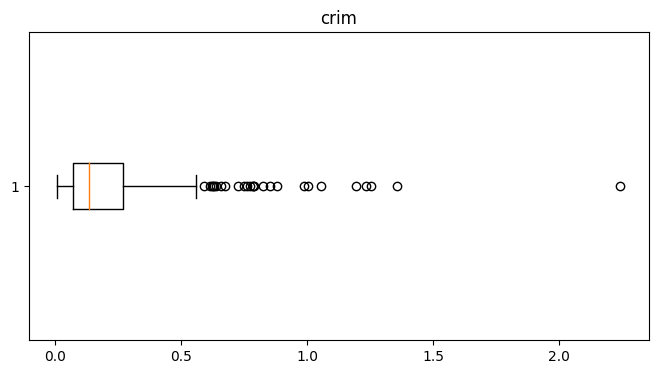

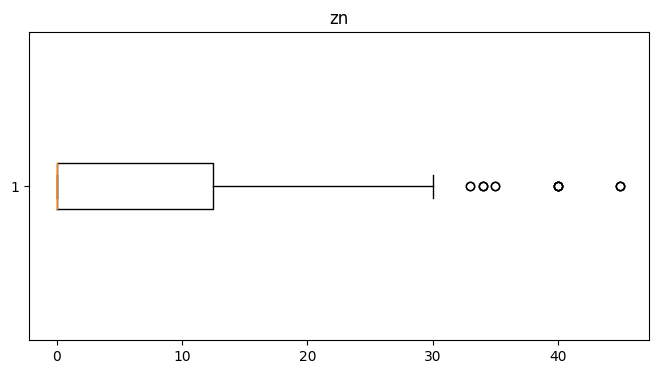

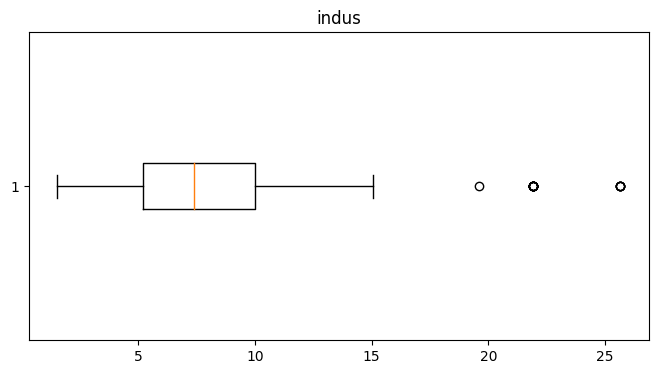

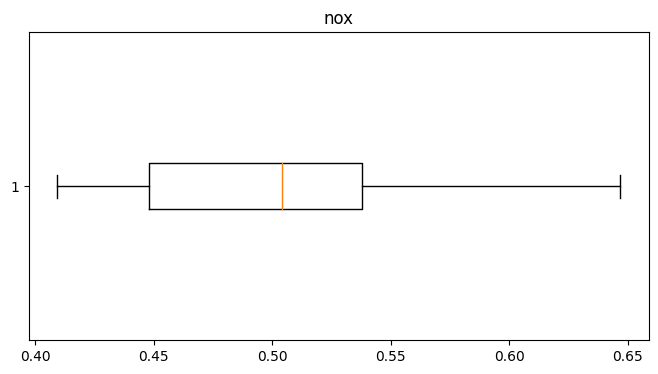

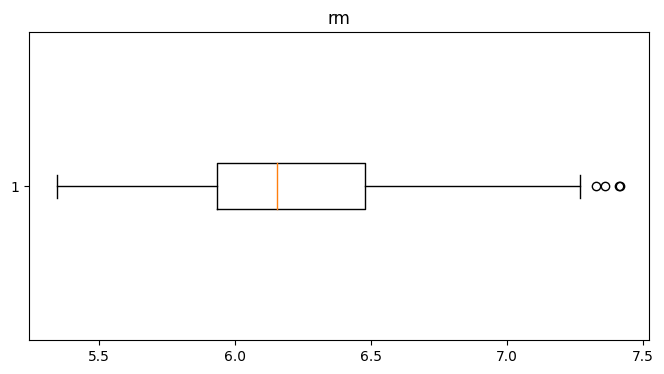

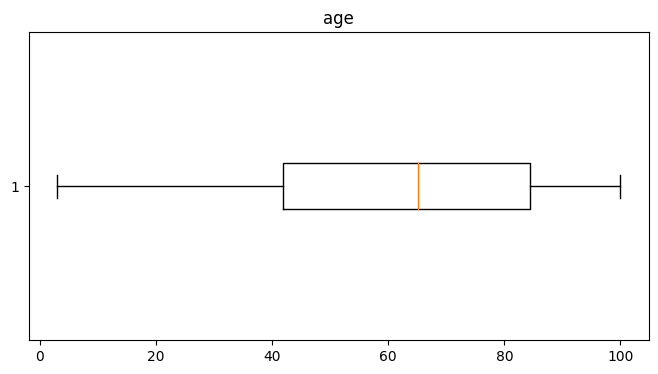

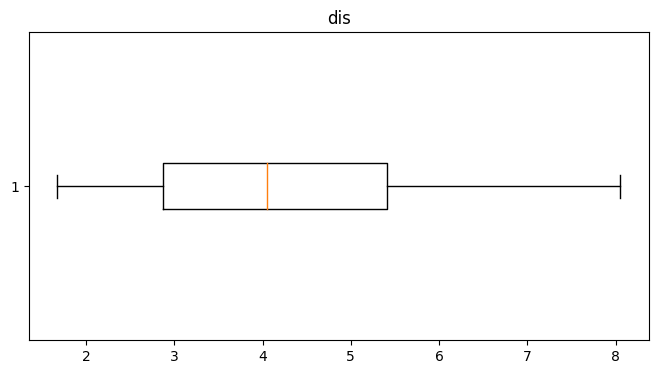

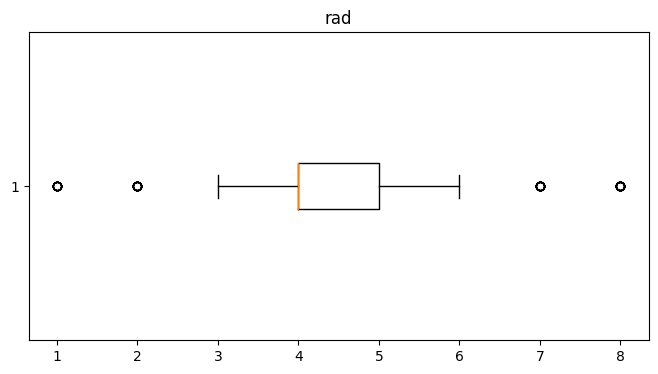

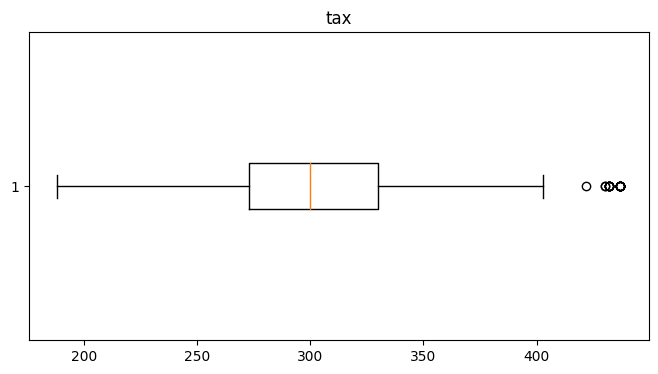

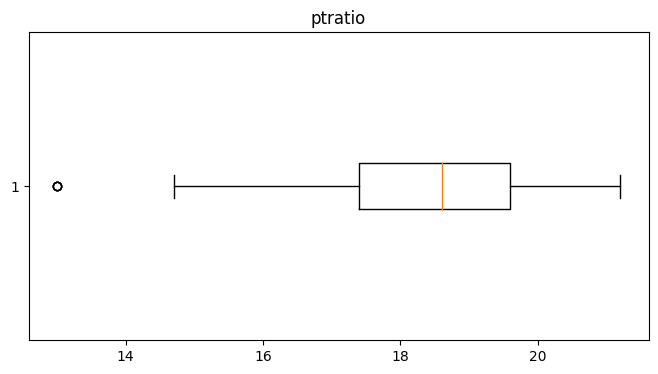

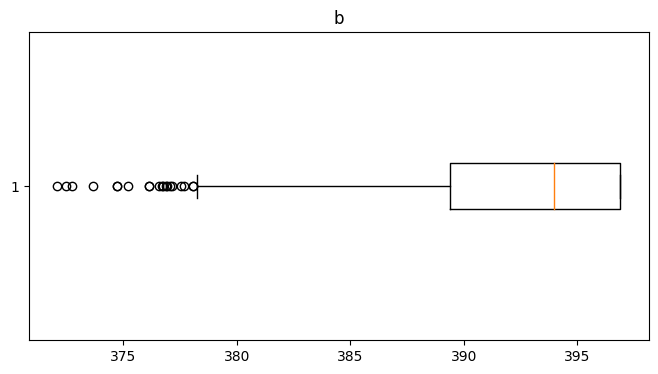

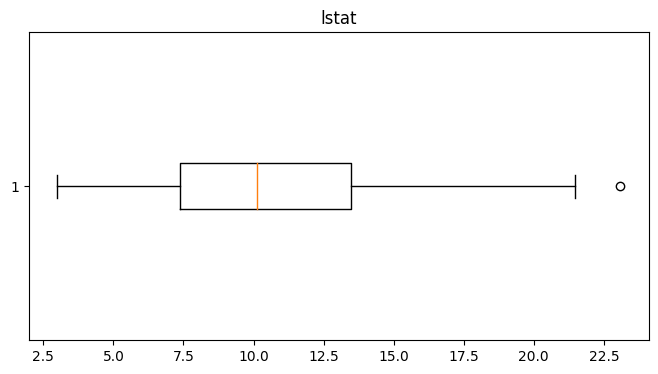

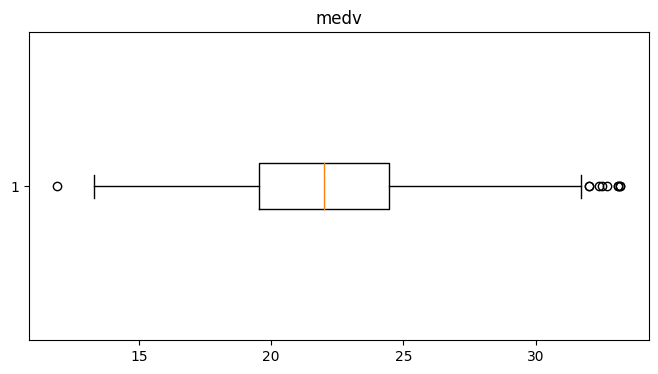

In [ ]:
import matplotlib.pyplot as plt
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.boxplot(data[col], vert=False)
    plt.title(col)
    plt.show()

In [ ]:
window_size = 3
data['rm_smoothed'] = data['rm'].rolling(window=window_size, min_periods=1).mean()
print(data[['rm', 'rm_smoothed']].head())

      rm  rm_smoothed
0  6.575     6.575000
1  6.421     6.498000
5  6.430     6.475333
6  6.012     6.287667
7  6.172     6.204667


In [ ]:
min_tax = data['tax'].min()
max_tax = data['tax'].max()
min_lstat = data['lstat'].min()
max_lstat = data['lstat'].max()

data['tax_normalized'] = (data['tax'] - min_tax) / (max_tax - min_tax)
data['lstat_normalized'] = (data['lstat'] - min_lstat) / (max_lstat - min_lstat)

print(data[['tax', 'tax_normalized', 'lstat', 'lstat_normalized']].head())

   tax  tax_normalized  lstat  lstat_normalized
0  296        0.433735   4.98          0.099453
1  242        0.216867   9.14          0.306315
5  222        0.136546   5.21          0.110890
6  311        0.493976  12.43          0.469915
7  311        0.493976  19.15          0.804078


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = data[['rm']]
y = data['medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Coefficients: [7.55031953]
Intercept: -24.572313415840842
Mean Squared Error: 9.799086317514996
R-squared: 0.5457986692723895


The regression analysis indicates a positive weak relationship between "medv" (median house value) and "rm" (average number of rooms). Each additional room, on average, is associated with an increase in the median house value, as suggested by the positive coefficient. This relationship is further supported by the R-squared value, indicating that a significant proportion of the variability in house values is explained by the number of rooms.